In [61]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [62]:
# load data
train = pd.read_csv('train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
# find null
train.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [64]:
train.shape

(614, 13)

In [65]:
# create new columns
# gender
train['Gender_1'] = train['Gender'].isnull()
# married
train['Married_1'] = train['Married'].isnull()
# dependents
train['Dependents_1'] = train['Dependents'].isnull()
# self_employed
train['Self_Employed_1'] = train['Self_Employed'].isnull()
# loanamount
train['LoanAmount_1'] = train['LoanAmount'].isnull()
# loan amount term
train['Loan_Amount_Term_1'] = train['Loan_Amount_Term'].isnull()
# credit history
train['Credit_History_1'] = train['Credit_History'].isnull()

In [66]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_1,Married_1,Dependents_1,Self_Employed_1,LoanAmount_1,Loan_Amount_Term_1,Credit_History_1
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,False,False,False,False,True,False,False
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,False,False,False,False,False,False,False
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,False,False,False,False,False,False,False
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,False,False,False,False,False,False,False
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,False,False,False,False,False,False,False


In [67]:
# dealing with missing values
# impute
# GENDER
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
# MARRIED
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
# dependents
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
# self_employed
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
# Loanamount
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)
#loan amount term
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
#credit history
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [68]:
train.isnull().sum().sum()

0

In [69]:
train.shape

(614, 20)

In [70]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_1,Married_1,Dependents_1,Self_Employed_1,LoanAmount_1,Loan_Amount_Term_1,Credit_History_1
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,False,False,False,False,True,False,False
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,False,False,False,False,False,False,False
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,False,False,False,False,False,False,False
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,False,False,False,False,False,False,False
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,False,False,False,False,False,False,False


In [71]:
# frequency of non-numerical values
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

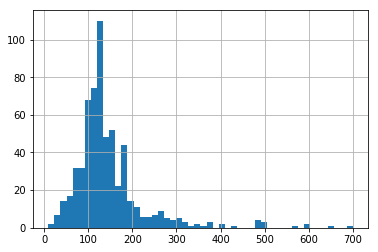

In [72]:
# distribution of the loan amount
train['LoanAmount'].hist(bins=50)

In [73]:
# understand distribution of categorical variables
# loan approval rates in absolute numbers
loan_approval = train['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


In [74]:
# standardize the data columns
from sklearn.preprocessing import StandardScaler
# ApplicantIncome
scaler_ApplicantIncome = StandardScaler()
train['ApplicantIncome'] = train['ApplicantIncome'].astype('float64')
train['ApplicantIncome'] = scaler_ApplicantIncome.fit_transform(train.ApplicantIncome.values.reshape(-1,1))
#CoapplicantIncome
scaler_CoapplicantIncome = StandardScaler()
train['CoapplicantIncome'] = scaler_CoapplicantIncome.fit_transform(train.CoapplicantIncome.values.reshape(-1,1))
#LoanAmount
scaler_LoanAmount = StandardScaler()
train['LoanAmount'] = scaler_LoanAmount.fit_transform(train.LoanAmount.values.reshape(-1,1))
#Loan_Amount_Term
scaler_Loan_Amount_Term = StandardScaler()
train['Loan_Amount_Term'] = scaler_Loan_Amount_Term.fit_transform(train.Loan_Amount_Term.values.reshape(-1,1))

In [75]:
# label encoder
from sklearn.preprocessing import LabelEncoder
# Loan_Status
encoder_Loan_Status = LabelEncoder()
train['Loan_Status'] = encoder_Loan_Status.fit_transform(train.Loan_Status)
# gender
encoder_Gender = LabelEncoder()
train['Gender'] = encoder_Gender.fit_transform(train.Gender)
# married
encoder_Married = LabelEncoder()
train['Married'] = encoder_Married.fit_transform(train.Married)
# education
encoder_Education = LabelEncoder()
train['Education'] = encoder_Education.fit_transform(train.Education)
# self_employed
encoder_Self_Employed = LabelEncoder()
train['Self_Employed'] = encoder_Self_Employed.fit_transform(train.Self_Employed)
# Gender_1
encoder_Gender_1 = LabelEncoder()
train['Gender_1'] = encoder_Gender_1.fit_transform(train.Gender_1)
# Married_1
encoder_Married_1 = LabelEncoder()
train['Married_1'] = encoder_Married_1.fit_transform(train.Married_1)
# Dependents_1
encoder_Dependents_1 = LabelEncoder()
train['Dependents_1'] = encoder_Dependents_1.fit_transform(train.Dependents_1)
# Self_Employed_1
encoder_Self_Employed_1 = LabelEncoder()
train['Self_Employed_1'] = encoder_Self_Employed_1.fit_transform(train.Self_Employed_1)
# LoanAmount_1
encoder_LoanAmount_1 = LabelEncoder()
train['LoanAmount_1'] = encoder_LoanAmount_1.fit_transform(train.LoanAmount_1)
# Loan_Amount_Term_1
encoder_Loan_Amount_Term_1 = LabelEncoder()
train['Loan_Amount_Term_1'] = encoder_Loan_Amount_Term_1.fit_transform(train.Loan_Amount_Term_1)
# Credit_History_1
encoder_Credit_History_1 = LabelEncoder()
train['Credit_History_1'] = encoder_Credit_History_1.fit_transform(train.Credit_History_1)

In [77]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_1,Married_1,Dependents_1,Self_Employed_1,LoanAmount_1,Loan_Amount_Term_1,Credit_History_1
0,LP001002,1,0,0,0,0,0.072991,-0.554487,-0.302759,0.273231,1.0,Urban,1,0,0,0,0,1,0,0
1,LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.207648,0.273231,1.0,Rural,0,0,0,0,0,0,0,0
2,LP001005,1,1,0,0,1,-0.393747,-0.554487,-0.944757,0.273231,1.0,Urban,1,0,0,0,0,0,0,0
3,LP001006,1,1,0,1,0,-0.462062,0.251980,-0.302759,0.273231,1.0,Urban,1,0,0,0,0,0,0,0
4,LP001008,1,0,0,0,0,0.097728,-0.554487,-0.053093,0.273231,1.0,Urban,1,0,0,0,0,0,0,0


In [78]:
# drop Loan_ID
train = train.drop(['Loan_ID'],axis=1)

In [79]:
# dummies
train = pd.get_dummies(train, prefix_sep='_', drop_first=True)
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,...,Dependents_1,Self_Employed_1,LoanAmount_1,Loan_Amount_Term_1,Credit_History_1,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0.072991,-0.554487,-0.302759,0.273231,1.0,1,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,-0.134412,-0.038732,-0.207648,0.273231,1.0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,1,-0.393747,-0.554487,-0.944757,0.273231,1.0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,-0.462062,0.251980,-0.302759,0.273231,1.0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0.097728,-0.554487,-0.053093,0.273231,1.0,1,...,0,0,0,0,0,0,0,0,0,1


In [82]:
train.shape

(614, 22)

In [83]:
# reshuffle
train = train.sample(frac=1)
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,...,Dependents_1,Self_Employed_1,LoanAmount_1,Loan_Amount_Term_1,Credit_History_1,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
94,1,0,1,0,-0.292176,-0.554487,-1.432200,-3.454858,1.0,1,...,0,0,0,0,0,0,0,0,1,0
78,1,1,0,0,-0.366389,0.813565,0.410572,-0.658791,0.0,0,...,0,0,0,0,0,0,0,1,1,0
142,1,0,0,1,0.253362,-0.554487,0.351128,-2.522836,1.0,1,...,0,0,0,0,0,0,0,0,1,0
211,1,1,0,0,-0.323302,-0.126971,-0.207648,0.273231,0.0,0,...,0,0,0,0,0,0,0,1,1,0
26,1,1,0,0,-0.426676,0.216068,-0.278981,0.273231,1.0,1,...,0,0,0,0,0,0,0,0,1,0


In [84]:
# bring the loan status column to be 1st
Loan_Status = train['Loan_Status']
train.drop(['Loan_Status'], axis=1, inplace=True)
train.insert(0,'Loan_Status', Loan_Status)

In [85]:
train.head()

,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Dependents_1,Self_Employed_1,LoanAmount_1,Loan_Amount_Term_1,Credit_History_1,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
94,1,1,0,1,0,-0.292176,-0.554487,-1.432200,-3.454858,1.0,...,0,0,0,0,0,0,0,0,1,0
78,0,1,1,0,0,-0.366389,0.813565,0.410572,-0.658791,0.0,...,0,0,0,0,0,0,0,1,1,0
142,1,1,0,0,1,0.253362,-0.554487,0.351128,-2.522836,1.0,...,0,0,0,0,0,0,0,0,1,0
211,0,1,1,0,0,-0.323302,-0.126971,-0.207648,0.273231,0.0,...,0,0,0,0,0,0,0,1,1,0
26,1,1,1,0,0,-0.426676,0.216068,-0.278981,0.273231,1.0,...,0,0,0,0,0,0,0,0,1,0


In [86]:
# rename irrelevant columns created
train.rename(columns={'Loan_Amount_Term':'Loan_Term',
                      'Gender_Male':'Gender',
                      'Married_Yes':'Married',
                      'Dependents_1':'Dependents1',
                      'Dependents_2':'Dependents2',
                      'Dependents_3+':'Dependents3',
                      'Education_Not Graduate':'Education',
                      'Self_Employed_Yes':'Self_Employed',
                      'Property_Area_Semiurban':'Semiurban',
                      'Property_Area_Urban': 'Urban'}, inplace=True)

In [90]:
pd.set_option('display.max_columns', 500)

In [91]:
train.head()

,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History,Gender_1,Married_1,Dependents1,Self_Employed_1,LoanAmount_1,Loan_Amount_Term_1,Credit_History_1,Dependents1,Dependents2,Dependents3,Semiurban,Urban
94,1,1,0,1,0,-0.292176,-0.554487,-1.432200,-3.454858,1.0,0,0,0,0,0,0,0,0,0,0,1,0
78,0,1,1,0,0,-0.366389,0.813565,0.410572,-0.658791,0.0,0,0,0,0,0,0,0,0,0,1,1,0
142,1,1,0,0,1,0.253362,-0.554487,0.351128,-2.522836,1.0,0,0,0,0,0,0,0,0,0,0,1,0
211,0,1,1,0,0,-0.323302,-0.126971,-0.207648,0.273231,0.0,0,0,0,0,0,0,0,0,0,1,1,0
26,1,1,1,0,0,-0.426676,0.216068,-0.278981,0.273231,1.0,0,0,0,0,0,0,0,0,0,0,1,0


In [88]:
train.shape

(614, 22)

In [93]:
# adjusted r-squared
# import statsmodels. formula.api
import statsmodels.formula.api as smf
# regression formular
model = smf.ols(formula='Loan_Status ~  Gender+ApplicantIncome+CoapplicantIncome+LoanAmount+Loan_Term+Credit_History+Married+Dependents1+Dependents2+Dependents3+Education+Self_Employed+Semiurban+Urban+ Gender_1 + Married_1 + Dependents1 + Self_Employed_1 + LoanAmount_1 + Loan_Amount_Term_1 + Credit_History_1', data=train)
# fit the regression
model_fit = model.fit()
# extract and readjust r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.31063940576222204


In [94]:
# spliting datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, Loan_Status, test_size=0.1, random_state=42)

In [95]:
# simple models
# logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1.0, penalty='l2', tol=0.0001)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

from sklearn.metrics import accuracy_score
LR=accuracy_score(y_test,y_pred)

In [96]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

knn = accuracy_score(y_test,y_pred)

In [97]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred =gnb.predict(X_test)

gnb = accuracy_score(y_test,y_pred)

In [98]:
# linear regression #### output had errors
# support vector regression

In [99]:
# decision tree
from sklearn import tree
tree = tree.DecisionTreeClassifier(random_state=42)
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

tree = accuracy_score(y_test,y_pred)

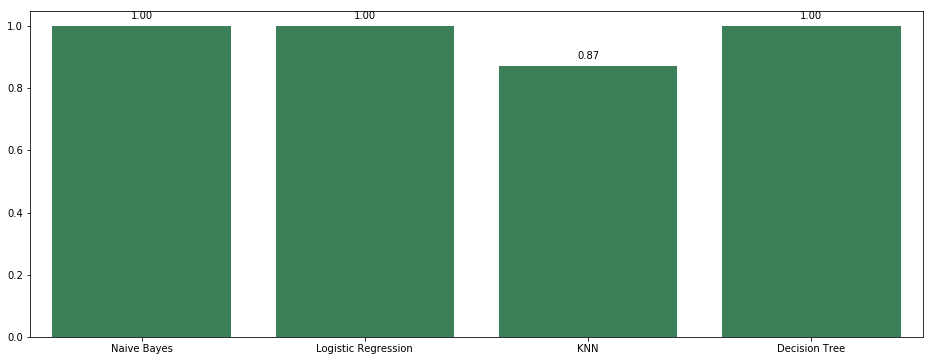

In [102]:
plt.figure(figsize=(16, 6))
s = sns.barplot(x=["Naive Bayes", "Logistic Regression","KNN","Decision Tree"], y=[gnb,LR,knn,tree],color="seagreen")
for p in s.patches:
    s.annotate(format(p.get_height(), '.2f'), 
              (p.get_x() + p.get_width() / 2., 

               p.get_height()), ha = 'center', va = 'center', 
              xytext = (0, 10), textcoords = 'offset points')

# ENSEMBLES METHODS

In [106]:
# import metrics
from sklearn.metrics import accuracy_score, f1_score

In [107]:
# BOOSTING
# ADABOOST
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=100)
adb = adb.fit(X_train,y_train)
y_pred = adb.predict(X_test)

adb = f1_score(y_test,y_pred)

In [108]:
# GRADIENT TREE BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier ()
gbc = gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

gbc = f1_score(y_test,y_pred)

In [112]:
# LightGBM
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=5)
lgbm = lgbm.fit(X_train,y_train)
y_pred = lgbm.predict(X_test)

lgbm = f1_score(y_test,y_pred)

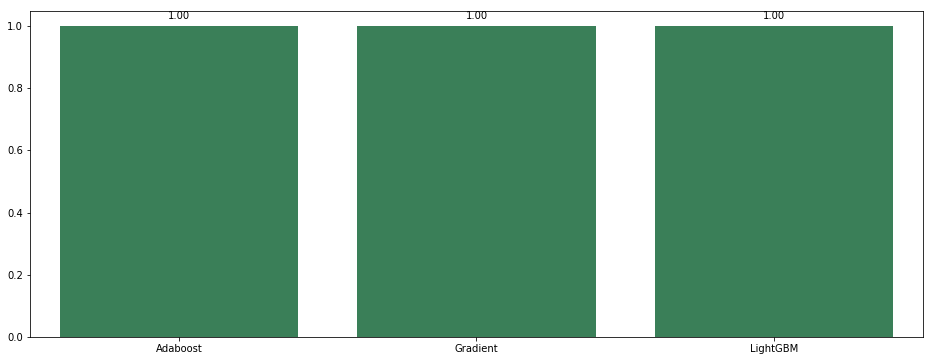

In [115]:
plt.figure(figsize=(16, 6))
s = sns.barplot(x=["Adaboost","Gradient","LightGBM"], y=[adb,gbc,lgbm],color="seagreen")
for p in s.patches:
    s.annotate(format(p.get_height(), '.2f'), 
              (p.get_x() + p.get_width() / 2., 

               p.get_height()), ha = 'center', va = 'center', 
              xytext = (0, 10), textcoords = 'offset points')